In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
sns.set()

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

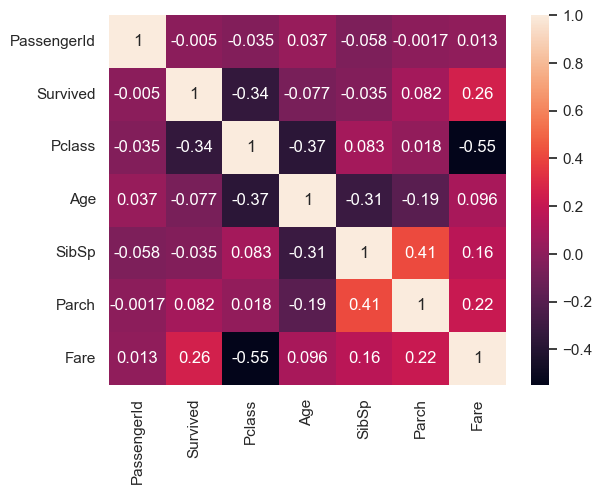

In [6]:
sns.heatmap(data.corr(),annot=True)

Predicting age using Linear Regression

In [7]:
data_eda = data.copy()

In [8]:
df2 = data_eda[['Pclass','SibSp','Parch','Age']]
df2
test_df = df2[df2['Age'].isnull()]
df2 = df2.dropna()

In [9]:
x_train_mv = df2.iloc[:,0:-1]
y_train_mv = df2.iloc[:,-1]

x_test_mv = test_df.iloc[:,0:-1]
y_test_mv = test_df.iloc[:,-1]

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_mv,y_train_mv)

LinearRegression()

In [11]:
y_pred = lr.predict(x_test_mv)
data_eda.loc[data_eda.Age.isnull(),'Age'] = y_pred

Predicting cabin using Random Forest  

In [12]:
df = data_eda[~data_eda['Cabin'].isnull()]
df = df[['Cabin','Fare','Pclass','Sex']].reset_index(drop = True)
df['Cabin'] = df['Cabin'].str[0]
df['Age'] = data_eda['Age']

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df['Cabin'].unique()

array([2, 4, 6, 3, 0, 1, 5, 7])

In [14]:
data_eda['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<AxesSubplot:xlabel='Cabin', ylabel='count'>

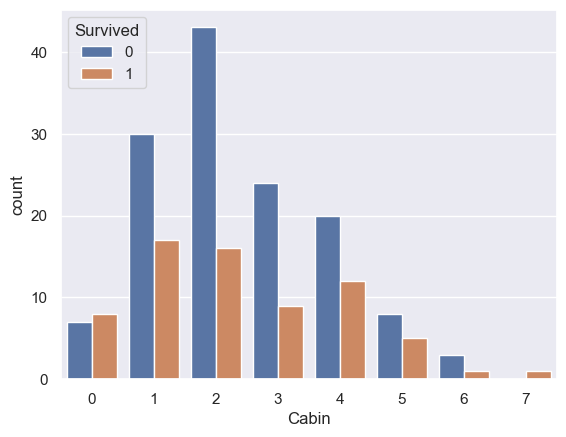

In [15]:
sns.countplot(data = df,x = df['Cabin'],hue = data['Survived'])

In [16]:
df["Sex"].replace({"male": 0, "female": 1}, inplace = True)
data_eda["Sex"].replace({"male": 0, "female": 1}, inplace = True)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
x_train_cab = df.iloc[:,1:]
y_train_cab = df.iloc[:,0]

In [19]:
x_test_cab = data_eda[data_eda['Cabin'].isnull()]
x_test_cab = x_test_cab[['Fare','Pclass','Age','Sex']].reset_index(drop = True)

y_test_cab = data_eda[data_eda['Cabin'].isnull()]['Cabin']
y_test_cab.reset_index(drop = True)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
682    NaN
683    NaN
684    NaN
685    NaN
686    NaN
Name: Cabin, Length: 687, dtype: object

In [20]:
rm = RandomForestClassifier(n_estimators=20)
rm.fit(x_train_cab,y_train_cab)

RandomForestClassifier(n_estimators=20)

In [21]:
x_test_cab = x_test_cab[['Fare','Pclass','Sex','Age']]

In [22]:
y_pred_cab = rm.predict(x_test_cab)
y_pred_cab

array([5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 4, 0, 2, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 6, 5, 5, 5, 4, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 0, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 3, 3,
       5, 6, 5, 6, 5, 3, 5, 5, 5, 5, 4, 4, 4, 5, 1, 5, 5, 5, 5, 4, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 2, 4, 5, 5,
       3, 5, 5, 4, 5, 3, 6, 5, 5, 5, 5, 4, 6, 5, 5, 5, 5, 5, 5, 6, 5, 4,
       5, 3, 4, 5, 5, 3, 5, 3, 5, 5, 3, 5, 3, 5, 5, 4, 3, 5, 6, 6, 5, 5,
       5, 5, 3, 5, 5, 6, 5, 6, 2, 1, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 1, 6, 5, 2, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 6, 4, 5, 4, 3, 3, 5,
       5, 6, 6, 4, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5,
       2, 5, 4, 5, 5, 5, 1, 4, 5, 2, 5, 5, 5, 5, 5,

In [23]:
data_eda['Cabin'] = data_eda['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data_eda.loc[data_eda.Cabin.notna(), ['Cabin']]=enc.fit_transform(data_eda['Cabin'].dropna().values.reshape(-1,1))
test.loc[test.Cabin.notna(), ['Cabin']]=enc.transform(test['Cabin'].dropna().values.reshape(-1,1))
test['Cabin'].unique()

array([nan, 1.0, 4.0, 0.0, 2.0, 3.0, 5.0, 6.0], dtype=object)

In [24]:
data_eda.loc[data_eda.Cabin.isnull(),'Cabin'] = y_pred_cab

In [25]:
data_eda['Cabin'] = data_eda['Cabin'].astype(int)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

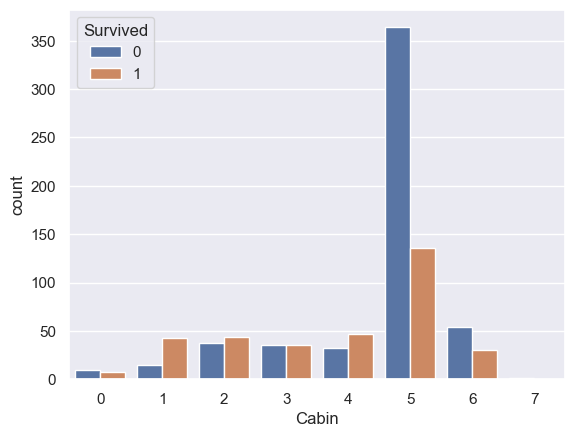

In [26]:
sns.countplot(data = data_eda,x = data_eda['Cabin'],hue = data_eda['Survived'])

In [27]:
data['Cabin'].str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [28]:
data_eda['Cabin'].value_counts()

5    500
6     84
2     82
4     79
3     70
1     58
0     17
7      1
Name: Cabin, dtype: int64

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [30]:
data_eda = data_eda.drop(['PassengerId','Name','Ticket'],axis=1)

test_data = test.drop(['PassengerId','Name','Ticket'],axis=1)

In [31]:
data_eda = data_eda.dropna() 

In [32]:
column_transformer = ColumnTransformer(
[
    ('trf1', OrdinalEncoder(),['Embarked','Sex']),
    ('trf2',OneHotEncoder(),['Pclass','Sex','Embarked']),
    ('trf3',StandardScaler(),['Age','Fare'])
],remainder ='passthrough'
)

In [33]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,2.0,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [34]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer
sm = SimpleImputer()
test_data['Fare']=sm.fit_transform(test_data['Fare'].values.reshape(-1,1))

In [36]:
df3 = test_data[['Pclass','SibSp','Parch','Age']]
df3
test_df2 = df3[df3['Age'].isnull()]
df3 = df3.dropna()

x_train_t = df3.iloc[:,0:-1]
y_train_t = df3.iloc[:,-1]

x_test_t = test_df2.iloc[:,0:-1]
y_test_t= test_df2.iloc[:,-1]

In [37]:
y_pred_t = lr.predict(x_test_t)
test_data.loc[test_data.Age.isnull(),'Age'] = y_pred_t

In [38]:
df4 = test_data[~test_data['Cabin'].isnull()]
df4=df4.reset_index(drop = True)

In [39]:
x_test_cab_t = test_data[test_data['Cabin'].isnull()]
x_test_cab_t = x_test_cab_t[['Fare','Pclass','Sex','Age']].reset_index(drop = True)
x_test_cab_t

,Fare,Pclass,Sex,Age
0,7.8292,3,male,34.500000
1,7.0000,3,female,47.000000
2,9.6875,2,male,62.000000
3,8.6625,3,male,27.000000
4,12.2875,3,female,22.000000
...,...,...,...,...
322,7.7750,3,female,28.000000
323,8.0500,3,male,27.703111
324,7.2500,3,male,38.500000
325,8.0500,3,male,27.703111


In [40]:
x_test_cab_t["Sex"].replace({"male": 0, "female": 1}, inplace = True)
test_data["Sex"].replace({"male": 0, "female": 1}, inplace = True)

In [41]:
data_eda.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [42]:
y_pred_test = rm.predict(x_test_cab_t)
y_pred_test

array([5, 5, 4, 5, 6, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 6, 5, 4, 5, 2, 3,
       4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 5, 6, 3, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 0, 5, 5, 6, 5, 5, 5, 3, 1, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 5, 3, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 6, 5, 5, 2,
       5, 2, 6, 5, 2, 5, 5, 5, 6, 5, 5, 5, 6, 5, 3, 3, 5, 5, 5, 5, 2, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 6, 4, 5, 5, 5, 3,
       6, 6, 3, 4, 3, 4, 5, 3, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 3, 6,
       5, 5, 4, 5, 5, 3, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 3, 5, 4, 5, 5, 4, 5, 5, 1, 5, 6, 5, 5, 6, 5, 5, 3, 5,
       5, 3, 6, 3, 5, 4, 5, 5, 5, 5, 2, 5, 5, 6, 5, 5, 5, 0, 5, 5, 5, 5,
       5, 4, 6, 5, 5, 5, 5, 5, 3, 5, 5, 5, 4, 1, 5, 4, 5, 3, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 3, 5, 3, 5, 3, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 2, 5, 3, 5, 1, 6, 3, 5, 5, 5,

In [43]:
test_data[~test_data['Cabin'].isnull()]['Cabin']
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# test_data.loc[test_data.Cabin.notna(), ['Cabin']]=enc.fit_transform(test_data['Cabin'].dropna().values.reshape(-1,1))

test_data.loc[test_data.Cabin.isnull(),'Cabin'] = y_pred_test

In [44]:
data_eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,5,S
1,1,1,1,38.000000,1,0,71.2833,2,C
2,1,3,1,26.000000,0,0,7.9250,6,S
3,1,1,1,35.000000,1,0,53.1000,2,S
4,0,3,0,35.000000,0,0,8.0500,5,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,3,S
887,1,1,1,19.000000,0,0,30.0000,1,S
888,0,3,1,20.924109,1,2,23.4500,5,S
889,1,1,0,26.000000,0,0,30.0000,2,C


In [45]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
x_train = data_eda.iloc[:,1:]
y_train = data_eda.iloc[:,0]

x_test = test_data

In [48]:
y_test = pd.read_csv('gender_submission.csv')
y_test = y_test['Survived']

In [49]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,5,Q
1,3,1,47.0,1,0,7.0000,5,S
2,2,0,62.0,0,0,9.6875,4,Q
3,3,0,27.0,0,0,8.6625,5,S
4,3,1,22.0,1,1,12.2875,6,S


In [50]:
trf1 = ColumnTransformer([
    ('ord_sex_embarked',OrdinalEncoder(),[7])
],remainder ='passthrough')

trf2 = ColumnTransformer([
    ('oht_sex_emb_pclass',OneHotEncoder(),[0,1,7])
],remainder ='passthrough')

trf3 = ColumnTransformer([
    ('scale',StandardScaler(),[2,5])
],remainder ='passthrough')

pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [51]:
x_train = pipe.fit_transform(x_train)

In [52]:
x_test = pipe.transform(x_test)

In [53]:
print(x_train.shape)
print(x_test.shape)

(889, 19)
(418, 19)


In [54]:
models = []
auc_score = []

Modelling

Linear Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [66]:
y_pred_lr = lr.predict(x_test)
log_ref_acc = accuracy_score(y_test,y_pred_lr)

In [67]:
log_ref_acc

0.9090909090909091

In [68]:
models.append("Logistic Regression")
auc_score.append(log_ref_acc)

SGD Classifier

In [105]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=200)
sgd_clf.fit(x_train, y_train)

SGDClassifier(max_iter=200)

In [106]:
y_pred_sgd = sgd_clf.predict(x_test)
log_reg_sgd = accuracy_score(y_test,y_pred_sgd)

In [107]:
log_reg_sgd

0.8947368421052632

In [108]:
models.append("SGD Classifier")
auc_score.append(log_reg_sgd)

SVM

In [139]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear')
svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [140]:
y_pred_svm = svm_clf.predict(x_test)
svm_acc = accuracy_score(y_test,y_pred_svm)
svm_acc

0.9880382775119617

In [141]:
models.append("SVM")
auc_score.append(svm_acc)

Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=150,n_jobs=-1)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1)

In [192]:
y_pred_rfc = forest_clf.predict(x_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

In [193]:
rfc_acc

0.8205741626794258

In [194]:
models.append("Random Forest")
auc_score.append(rfc_acc)

Models:-

In [197]:
models = pd.DataFrame({"model_name":models, "auc_score": auc_score})
models.sort_values("auc_score", ascending = False)

,model_name,auc_score
2,SVM,0.988038
0,Logistic Regression,0.909091
1,SGD Classifier,0.894737
3,Random Forest,0.820574


In [199]:
submission = pd.DataFrame({"PassengerId":test['PassengerId'],"Survived":y_pred_svm})

In [200]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [201]:
submission.to_csv('submission.csv')